In [1]:
%%capture
%pip install tensorflow pandas

Подключение библиотек:

In [2]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, GlobalMaxPooling1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
# Максимальное количество слов 
num_words = 60000
# Максимальная длина сообщения
max_messages_len = 50
# Количество классов сообщений
nb_classes = 6

In [4]:
# import csv
# with open('train.txt', 'r') as in_file:
#     stripped = (line.strip() for line in in_file)
#     lines = (line.split(",") for line in stripped if line)
#     with open('train.csv', 'w') as out_file:
#         writer = csv.writer(out_file)
#         writer.writerows(lines)

Считываем данные из файла для тренировки создаваемой модели нейросети:

In [5]:
train = pd.read_csv('train.csv',
                    sep = ';',
                    header=None, 
                    names=['text', 'class'])

In [6]:
train

,text,class
0,i didnt feel humiliated,1
1,i can go from feeling so hopeless to so damned...,1
2,im grabbing a minute to post i feel greedy wrong,4
3,i am ever feeling nostalgic about the fireplac...,3
4,i am feeling grouchy,4
...,...,...
16017,i think that you are stupid,4
16018,clown,4
16019,yes,2
16020,nigger,4


Выделяем для обучения столбец 'text'

In [7]:
messages = train['text']

In [8]:
messages[:5]

0                              i didnt feel humiliated
1    i can go from feeling so hopeless to so damned...
2     im grabbing a minute to post i feel greedy wrong
3    i am ever feeling nostalgic about the fireplac...
4                                 i am feeling grouchy
Name: text, dtype: object

Далее выделяем правильные ответы из столбца 'class'

In [9]:
y_train = utils.to_categorical(train['class'] - 1, nb_classes)
y_train

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

Далее идет токенизация текста(представление текста в числовом формате, так как с числами работать проще), используется токенизатор из библиотеки Keras

In [10]:
tokenizer = Tokenizer(num_words=num_words)

Обучаем токенизатор на столбце с сообщении из датасета:

In [11]:
tokenizer.fit_on_texts(messages)

Далее можно посмотреть словарь слов с присвоенными каждому слову числовым значением

In [12]:
tokenizer.word_index

{'i': 1,
 'feel': 2,
 'and': 3,
 'to': 4,
 'the': 5,
 'a': 6,
 'that': 7,
 'feeling': 8,
 'of': 9,
 'my': 10,
 'in': 11,
 'it': 12,
 'like': 13,
 'so': 14,
 'for': 15,
 'im': 16,
 'me': 17,
 'but': 18,
 'was': 19,
 'have': 20,
 'is': 21,
 'this': 22,
 'am': 23,
 'with': 24,
 'not': 25,
 'about': 26,
 'be': 27,
 'as': 28,
 'on': 29,
 'you': 30,
 'just': 31,
 'at': 32,
 'when': 33,
 'or': 34,
 'all': 35,
 'because': 36,
 'more': 37,
 'do': 38,
 'can': 39,
 'really': 40,
 'up': 41,
 'are': 42,
 't': 43,
 'by': 44,
 'very': 45,
 'know': 46,
 'been': 47,
 'if': 48,
 'out': 49,
 'myself': 50,
 'time': 51,
 'how': 52,
 'what': 53,
 'get': 54,
 'little': 55,
 'had': 56,
 'now': 57,
 'will': 58,
 'from': 59,
 'being': 60,
 'they': 61,
 'people': 62,
 'them': 63,
 'would': 64,
 'he': 65,
 'want': 66,
 'her': 67,
 'some': 68,
 'think': 69,
 'one': 70,
 'still': 71,
 'ive': 72,
 'him': 73,
 'even': 74,
 'who': 75,
 'an': 76,
 'life': 77,
 'its': 78,
 'make': 79,
 'there': 80,
 'we': 81,
 'bit': 82

In [13]:
sequences = tokenizer.texts_to_sequences(messages)


Далее посмотрим как будет выглядеть рандомное сообщение в виде набора чисел:

In [14]:
index = 1
print(messages[index])
print(sequences[index])

i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake
[1, 39, 100, 59, 8, 14, 493, 4, 14, 3496, 552, 31, 59, 60, 127, 147, 75, 1480, 3, 21, 1254]


Далее ограничивается длина сообщений для тренировки(30 слов), если количество слов меньше 30, то сообщение записывается с конца, а оставшееся место заполняется нулями.

In [15]:
x_train = pad_sequences(sequences, maxlen=max_messages_len)

In [16]:
x_train[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    1,  139,    2,  678],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    1,   39,  100,   59,
           8,   14,  493,    4,   14, 3496,  552,   31,   59,   60,  127,
         147,   75, 1480,    3,   21, 1254],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,   16, 3059,    6, 1148,
           4,  285,   

Далее создадим нейронную сеть(сверточную, библиотека Keras)

In [17]:
model_cnn = Sequential()
model_cnn.add(Embedding(num_words, 32, input_length=max_messages_len))
model_cnn.add(Conv1D(250, 5, padding='valid', activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(6, activation='softmax'))

In [18]:
model_cnn.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [19]:
model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            1920000   
                                                                 
 conv1d (Conv1D)             (None, 46, 250)           40250     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 128)               32128     
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 1,993,152
Trainable params: 1,993,152
Non-trainable params: 0
______________________________________________

Далее прописываем название файла, в котором будет сохранена лучшая из получившихся моделей, в дальнейшем можно будет выгружать из этого файла готовую модель('best_model_cnn.h5')

In [20]:
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

Далее обучаем нашу нейронную сеть и сохраним модель в файле 'best_model_cnn.h5'

In [21]:
history_cnn = model_cnn.fit(x_train, 
                            y_train, 
                            epochs=5,
                            batch_size=128,
                            validation_split=0.1,
                            callbacks=[checkpoint_callback_cnn])

Epoch 1/5
113/113 [==============================] - ETA: 0s - loss: 1.4996 - accuracy: 0.4097
Epoch 1: val_accuracy improved from -inf to 0.59888, saving model to best_model_cnn.h5
113/113 [==============================] - 19s 146ms/step - loss: 1.4996 - accuracy: 0.4097 - val_loss: 0.9932 - val_accuracy: 0.5989
Epoch 2/5
113/113 [==============================] - ETA: 0s - loss: 0.5811 - accuracy: 0.7951
Epoch 2: val_accuracy improved from 0.59888 to 0.88022, saving model to best_model_cnn.h5
113/113 [==============================] - 6s 57ms/step - loss: 0.5811 - accuracy: 0.7951 - val_loss: 0.3415 - val_accuracy: 0.8802
Epoch 3/5
112/113 [============================>.] - ETA: 0s - loss: 0.1837 - accuracy: 0.9328
Epoch 3: val_accuracy improved from 0.88022 to 0.91391, saving model to best_model_cnn.h5
113/113 [==============================] - 7s 58ms/step - loss: 0.1839 - accuracy: 0.9327 - val_loss: 0.2177 - val_accuracy: 0.9139
Epoch 4/5
113/113 [==============================]

Далее посмотрим процесс обучения нейронной сети на графике:

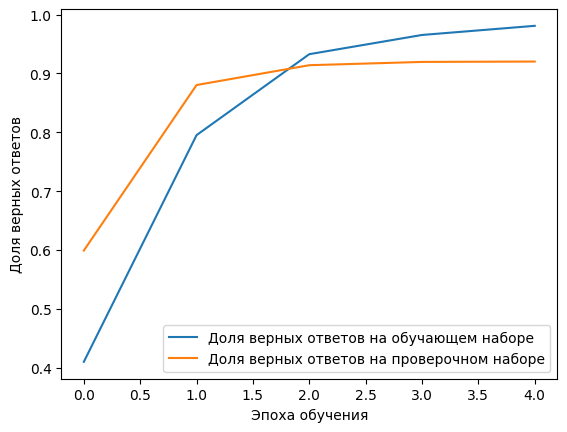

In [22]:
plt.plot(history_cnn.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_cnn.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Далее протестируем нашу нейросеть на данных, не пересекающихся с данными для тренировки нейросети, для этого для начала загрузим файл с тестовыми данными:

In [23]:
test = pd.read_csv('test.csv',
                    sep = ';',
                    header=None, 
                    names=['text', 'class'])

In [24]:
test

,text,class
0,im feeling rather rotten so im not very ambiti...,1
1,im updating my blog because i feel shitty,1
2,i never make her separate from me because i do...,1
3,i left with my bouquet of red and yellow tulip...,2
4,i was feeling a little vain when i did this one,1
...,...,...
2017,i think that you are stupid,4
2018,clown,4
2019,yes,2
2020,nigger,4


In [25]:
test_sequences = tokenizer.texts_to_sequences(test['text'])
x_test = pad_sequences(test_sequences, maxlen=max_messages_len)

In [26]:
x_test[:5]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,    16,     8,   202,   714,    14,    16,
           25,    45,  5596,   113,    57],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,    16, 12799,    10,
          242,    36,     1,     2,   468],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,    

In [27]:
y_test = utils.to_categorical(test['class'] - 1, nb_classes)

In [28]:
y_test

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [29]:
model_cnn.load_weights(model_cnn_save_path)

Далее проверим насколько точно модель справится с классификацией сообщений из тестового набора данных:

In [30]:
model_cnn.evaluate(x_test, y_test, verbose=1)

64/64 [==============================] - 0s 3ms/step - loss: 0.2194 - accuracy: 0.9174


[0.21941165626049042, 0.9174085259437561]

Как видно, доля правильных ответов равна 0.917 (доля правильных ответов может отличаться, но она примерно будет равна ~90%), что вполне неплохо.

Далее проверим работу созданной модели, подавая ей на вход произвольный текст

In [31]:
text = 'i feel like ive been so inspired and have been stretching myself in all kinds of directions but finally feel like setting down and going with the flow'
sequence = tokenizer.texts_to_sequences([text])


In [32]:
sequence

[[1,
  2,
  13,
  72,
  47,
  14,
  458,
  3,
  20,
  47,
  4686,
  50,
  11,
  35,
  2064,
  9,
  3776,
  18,
  407,
  2,
  13,
  2469,
  141,
  3,
  86,
  24,
  5,
  2196]]

In [33]:
data = pad_sequences(sequence, maxlen = max_messages_len)


In [34]:
data

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           1,    2,   13,   72,   47,   14,  458,    3,   20,   47, 4686,
          50,   11,   35, 2064,    9, 3776,   18,  407,    2,   13, 2469,
         141,    3,   86,   24,    5, 2196]])

In [35]:
result = model_cnn.predict(data)

1/1 [==============================] - 0s 202ms/step


In [36]:
result

array([[2.6602123e-03, 9.9355501e-01, 3.5259551e-03, 5.4562384e-05,
        7.8705423e-05, 1.2547307e-04]], dtype=float32)

В качестве выходных данных выдается массив с 6 числами, каждая из которых является вероятностью, что входное сообщение относится к соответствующему классу:

In [37]:
predicted_value = result.argmax()
predicted_value
def show_result(predicted_value):
    if predicted_value == 0:
        return 'sadness'
    if predicted_value == 1:
        return 'joy'
    if predicted_value == 2:
        return 'love'
    if predicted_value == 3:
        return 'anger'
    if predicted_value == 4:
        return 'fear'
    if predicted_value == 5:
        return 'surprise'
    return 'neutral'

Результат можно увидеть ниже:

In [38]:
show_result(predicted_value)


'joy'

Далее загрузим полученную модель, сохраненную в файле best_model_cnn.h5 и проверим ее работу с теми же входными данными, должна загрузиться модель, полностью идентичная созданной ранее.

In [39]:
from keras.models import load_model

In [40]:
loaded_model = load_model('best_model_cnn.h5')

In [41]:
test_result=loaded_model.predict(data)
new_predicted_value = test_result.argmax()
new_predicted_value

1/1 [==============================] - 0s 60ms/step


1

In [42]:
show_result(new_predicted_value)

'joy'